In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('dataset/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [93]:
df.shape

(962, 2)

<h2>Exploring Categories</h2>


In [94]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

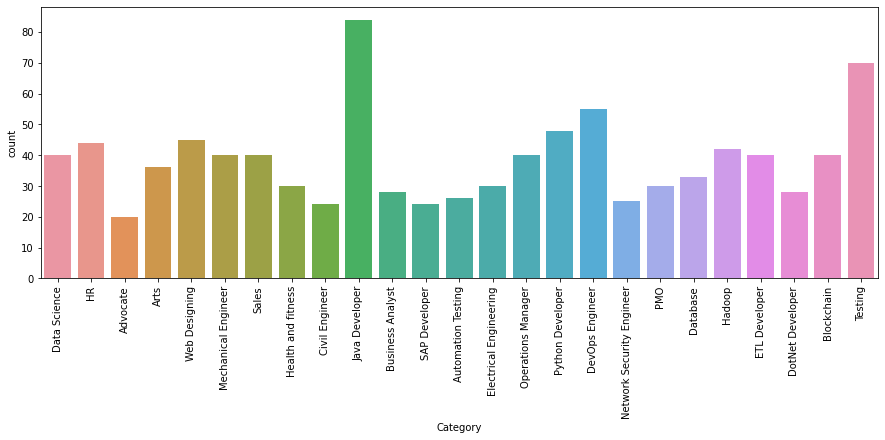

In [95]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()

In [96]:
labels = df['Category'].unique()
labels

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

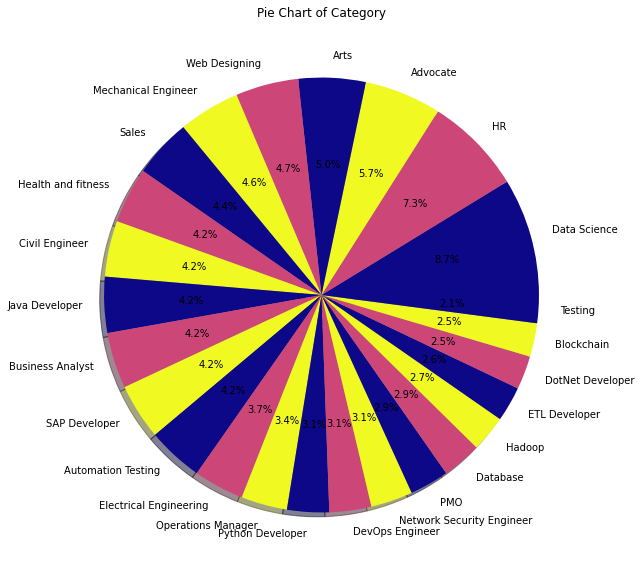

In [97]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.figure(figsize=(15, 10))

plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True,
        colors=plt.cm.plasma(np.linspace(0, 1, 3)))
plt.title('Pie Chart of Category')
plt.show()

<h2>Exploring Resume</h2>


In [98]:
df['Category'][0]

'Data Science'

In [99]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

<h2>Cleaning Data</h2>
<ul>
    <li order_list='number'>URLs</li>
    <li>hashtags</li>
    <li>mentions</li>
    <li>special letters</li>
    <li>punctuation</li>
</ul>


In [100]:
import re


def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape(
        """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)

    return cleanText

In [101]:
cleanResume(
    "my #### #hastag website link is this http://helloworld and access it @gmail.com")

'my website link is this and a ess it '

In [102]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [103]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

<h2>words into categorical values<h2>


In [104]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [106]:
le.fit(df['Category'])
df["Category"] = le.transform(df['Category'])

In [107]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [108]:
# array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

<h2>Vectorization</h2>


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [110]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [111]:
requiredText

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

<h2>Splitting</h2>


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(
    requiredText, df['Category'], test_size=0.2, random_state=42)

In [114]:
x_train.shape

(769, 7351)

In [115]:
x_test.shape

(193, 7351)

<h3>Now let's train the model and print the classification report</h3>


In [116]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
Accuracy: 0.9844559585492227


<h2>Prdiction system</h2>


In [117]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [118]:
myresume = """I am a software engineer specializing in Java development, with expertise in building scalable and robust applications. With a solid background in computer science and programming, I am passionate about creating efficient solutions to complex problems. I have extensive experience in developing backend systems, web applications, and enterprise software using Java and related technologies. My technical skills include proficiency in Java, Spring Framework, Hibernate, and Maven.

What sets me apart is my ability to design and implement elegant solutions that meet both functional and non-functional requirements. I excel in writing clean, maintainable code and adhere to best practices in software engineering. If you're seeking a dedicated and versatile Java developer to collaborate on challenging projects, I am eager to leverage my expertise to deliver high-quality solutions.

Contact & Sources
Email: johndoe@email.com
Phone: 123-456-7890
Github: https://github.com/johndoe
LinkedIn: https://www.linkedin.com/in/johndoe
Blogs: https://medium.com/@johndoe

ABOUT ME
WORK EXPERIENCE
SKILLS
JOHN DOE
LANGUAGES
English
Spanish
French

I am a versatile software engineer with expertise in various domains, including backend development, web development, and system architecture. Throughout my career, I have successfully delivered numerous projects, ranging from small-scale applications to large enterprise systems. I have a strong foundation in object-oriented programming, design patterns, and database management. My experience includes working with diverse teams to deliver innovative solutions that meet business requirements and exceed customer expectations.

Java Development
Spring Framework
Hibernate
Maven
RESTful APIs
Microservices Architecture
Database Management (SQL, MySQL)
Unit Testing and Test-Driven Development
Agile Methodologies
Effective Communication and Collaboration
"""

In [119]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category Id to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, 'unknown')

print("Predicted category:", category_name)

print(prediction_id)

Predicted category: Java Developer
15
